# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [129]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2025-03-15 16:03:45--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.4’

car_data.csv.4      100%[===================>]  57.01K  --.-KB/s    in 0.001s  

2025-03-15 16:03:46 (42.1 MB/s) - ‘car_data.csv.4’ saved [58374/58374]



In [130]:
import warnings
warnings.filterwarnings('ignore')

In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]
print(data.shape, target.shape)

(846, 19) (846,)


In [132]:
data

array([[  0,  95,  48, ...,  16, 187, 197],
       [  1,  91,  41, ...,  14, 189, 199],
       [  2, 104,  50, ...,   9, 188, 196],
       ...,
       [843, 106,  54, ...,   4, 187, 201],
       [844,  86,  36, ...,  25, 190, 195],
       [845,  85,  36, ...,  18, 186, 190]])

В данных `data` первая колонка представляет собой последовательность индексов строк, которая не несет важной информации, поэтому ее следует удалить.

In [133]:
data = data[:,1:]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 18) (549,) (297, 18) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [135]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,94,45,72,179,69,6,156,41,19,144,181,373,191,69,5,5,193,198
1,97,47,88,183,60,7,197,33,23,148,214,596,201,74,8,0,192,191
2,107,55,98,199,59,7,240,27,26,168,258,866,245,80,3,1,186,184
3,94,48,83,162,64,10,156,43,19,153,177,357,187,74,4,14,185,196
4,83,37,62,113,53,6,122,55,17,129,143,218,135,79,0,7,181,185
5,110,54,102,201,64,11,213,31,24,171,222,669,221,73,17,16,188,198
6,81,43,68,148,64,7,150,45,19,144,175,330,171,80,1,2,182,185
7,98,44,88,176,67,10,158,43,20,149,173,367,154,66,14,9,194,202
8,84,43,70,123,54,8,151,45,19,146,173,332,176,81,1,12,181,184
9,103,46,106,209,66,10,203,33,23,149,217,612,210,70,9,10,191,199


In [136]:
print(pd.DataFrame(target).isna().sum())
print('-'*10, 'Target classes', '-'*10)
pd.DataFrame(target).value_counts()

0    0
dtype: int64
---------- Target classes ----------


,count
0,
bus,218
saab,217
opel,212
van,199


Methods `describe` and `info` deliver some useful information.

In [137]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.695811,44.856102,82.151184,169.335155,61.743169,8.613843,168.961749,40.896175,20.588342,147.797814,188.683060,440.872495,174.908925,72.264117,6.462659,12.646630,189.043716,195.806922
std,8.323763,6.191534,15.843581,32.577766,7.334150,4.547024,33.444534,7.873206,2.611375,14.466962,31.402231,177.440383,32.611444,7.416531,4.781061,8.897987,6.142313,7.391494
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,143.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,168.000000,317.000000,150.000000,67.000000,3.000000,5.000000,185.000000,191.000000
50%,93.000000,44.000000,80.000000,169.000000,62.000000,8.000000,157.000000,43.000000,20.000000,145.000000,179.000000,366.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,199.000000,46.000000,23.000000,159.000000,217.000000,597.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,117.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,186.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [138]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
dtypes: int64(18)
memory usage: 77.3 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [139]:
import matplotlib.pyplot as plt

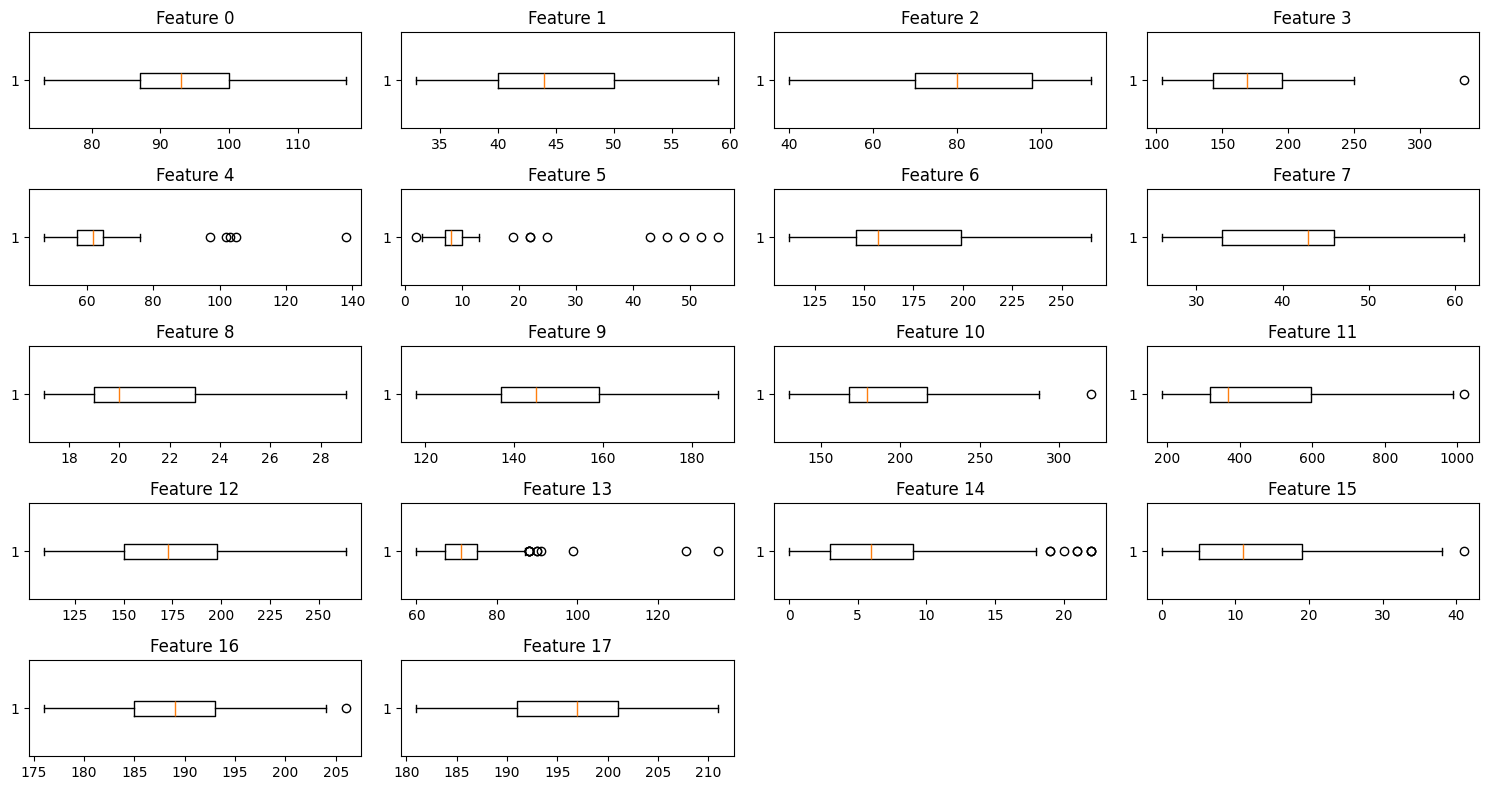

In [140]:
plt.figure(figsize=(15, 8))

for i in range(X_train.shape[1]):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_train_pd.iloc[:, i], vert=False)
    plt.title(f'Feature {i}')

plt.tight_layout()
plt.show()

In [141]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

#### Comment 2.0. Transformations
Данные нужно отмасштабировать, поскольку значения в данных значительно различаются. Кроме того, в некоторых признаках были выявлены выбросы. На данный момент я сохраню эти выбросы, но рассмотрю возможность их устранения, если производительность модели окажется неудовлетворительной.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [142]:
np.logspace(-5, 5, 11)

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])

In [143]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score
# import scikitplot as skplt

# generates 11 values between 10⁻⁵ (very small) and 10⁵ (very large) on a logarithmic scale.
# print(np.logspace(-5, 5, 11))

grid_search_lr = RandomizedSearchCV(
    estimator=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500),
    param_distributions={
        'C': np.logspace(-5, 5, 11),
        'penalty': ['l1', 'l2']
    },
    random_state=42)

print('-'*10, 'X_train', '-'*10)

grid_search_lr.fit(X_train, y_train)
print(f'Best parameters: {grid_search_lr.best_params_}')

y_pred = grid_search_lr.predict(X_test)
f1 = f1_score(y_test, y_pred, average="macro")
print(f'F1 score: {f1}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

y_probas = grid_search_lr.predict_proba(X_test)

---------- X_train ----------
Best parameters: {'penalty': 'l1', 'C': 100000.0}
F1 score: 0.7625014521748259
Accuracy score: 0.7744107744107744


In [144]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot

`scikit-plot` к сожалению в моем случае не работает

In [145]:
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [146]:
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
y_test_bin

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

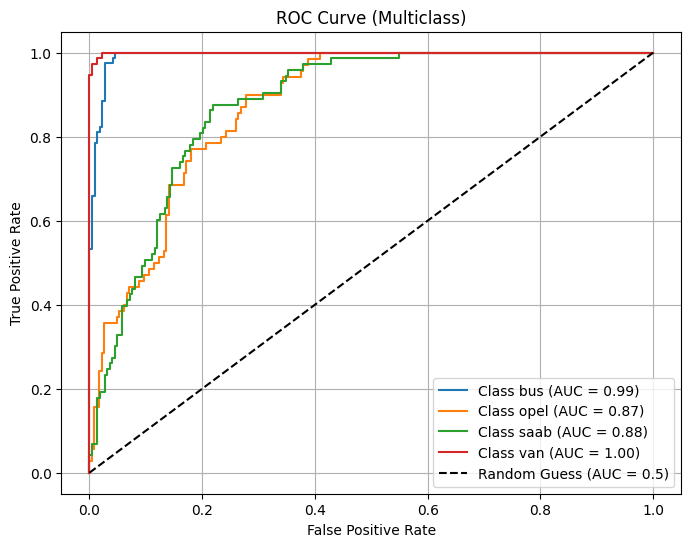

In [147]:
plt.figure(figsize=(8, 6))

for i in range(len(classes)):
    if np.sum(y_test_bin[:, i]) == 0:
        print(f"Class {i} is missing in y_test. Skipping...")
        continue

    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probas[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.title('ROC Curve (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

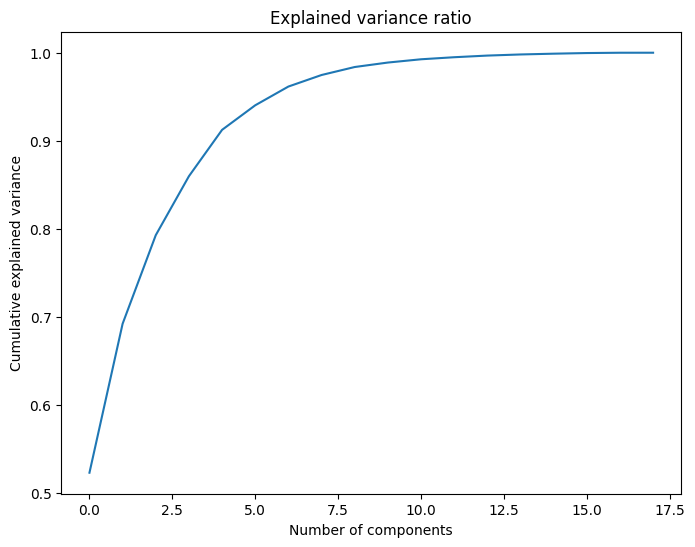

In [148]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained variance ratio')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

#### Comment 2.2. PCA: explained variance plot
Каждая точка на графике показывает, какую долю общей информации (дисперсии) сохраняет модель, если оставить только соответствующее количество главных компонент. На представленном графике около 5-6 компонент уже объясняют более 90% всей дисперсии данных.После этого добавление новых компонент улучшает объясняемую дисперсию незначительно (пологая часть графика).

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [149]:
### YOUR CODE HERE
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca.n_components_

7

#### Comment 2.3. PCA transformation
Для выбора оптимального количества компонент зададим параметр `n_components=0.95`, что выбирает количество компонент для объяснения 95% дисперсии. Таким образом мы сократим размерность данных без значительной потери информации, что ускорит обучение и уменьшит риск переобучения.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [150]:
### YOUR CODE HERE
grid_search_lr_pca = RandomizedSearchCV(
    estimator=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3),
    param_distributions={
        'C': np.logspace(-5, 5, 11),
        'penalty': ['l1', 'l2']
    },
    scoring='f1_macro',
    random_state=42)

print('-'*10, 'X_train_pca', '-'*10)

grid_search_lr_pca.fit(X_train_pca, y_train)
print(f'Best parameters: {grid_search_lr_pca.best_params_}')

y_pred = grid_search_lr_pca.predict(X_test_pca)
f1 = f1_score(y_test, y_pred, average="macro")
print(f'F1 score: {f1}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

y_probas = grid_search_lr_pca.predict_proba(X_test_pca)

---------- X_train_pca ----------
Best parameters: {'penalty': 'l2', 'C': 100.0}
F1 score: 0.5873080651593898
Accuracy score: 0.6094276094276094


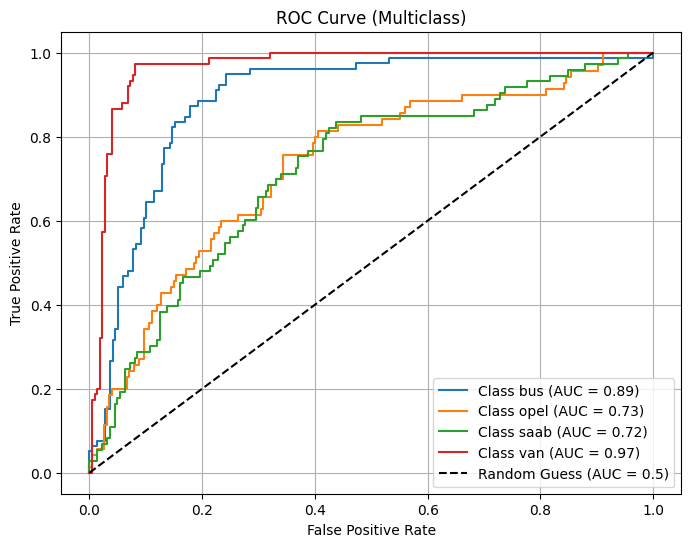

In [151]:
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8, 6))

for i in range(len(classes)):
    if np.sum(y_test_bin[:, i]) == 0:
        print(f"Class {i} is missing in y_test. Skipping...")
        continue

    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probas[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.title('ROC Curve (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [152]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
# X_train
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        'max_depth': range(1, 20)
    },
    scoring='f1_macro')

print('-'*10, 'X_train', '-'*10)

grid_search_dt.fit(X_train, y_train)
print(f'Best parameters: {grid_search_dt.best_params_}')

y_pred = grid_search_dt.predict(X_test)
f1 = f1_score(y_test, y_pred, average="macro")
print(f'F1 score: {f1}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

# X_train_pca
grid_search_dt_pca = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        'max_depth': range(1, 20)
    },
    scoring='f1_macro')

print('-'*10, 'X_train_pca', '-'*10)

grid_search_dt_pca.fit(X_train_pca, y_train)
print(f'Best parameters: {grid_search_dt_pca.best_params_}')

y_pred = grid_search_dt_pca.predict(X_test_pca)
f1 = f1_score(y_test, y_pred, average="macro")
print(f'F1 score: {f1}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

---------- X_train ----------
Best parameters: {'max_depth': 8}
F1 score: 0.6865021067393196
Accuracy score: 0.696969696969697
---------- X_train_pca ----------
Best parameters: {'max_depth': 5}
F1 score: 0.5857418216306074
Accuracy score: 0.5892255892255892


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

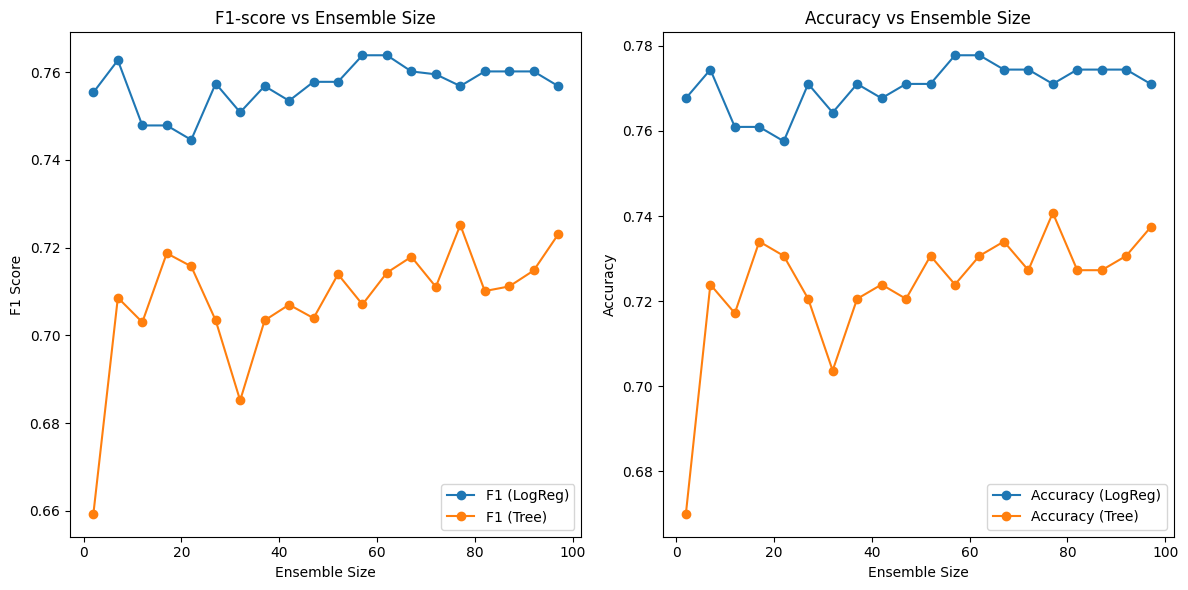

In [153]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

optimal_params_lr = grid_search_lr.best_params_
optimal_params_dt = grid_search_dt.best_params_
# First we will use the Bagging approach. Build an ensemble of  N  algorithms varying N from  Nmin=2  to  Nmax=100  (with step 5).
ensemble_sizes = list(range(2, 101, 5))

f1_scores_lr, accuracy_scores_lr = [], []
f1_scores_dt, accuracy_scores_dt = [], []

model_lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, **optimal_params_lr)
model_dt = DecisionTreeClassifier(**optimal_params_dt)

for n in ensemble_sizes:
    # We will build two ensembles: of logistic regressions and of decision trees.
    # bootstrapbool, default=True
        # Whether samples are drawn with replacement. If False, sampling without replacement is performed.
    bagging_lr = BaggingClassifier(model_lr, n_estimators=n, bootstrap=True, random_state=42)
    bagging_dt = BaggingClassifier(model_dt, n_estimators=n, bootstrap=True, random_state=42)

    bagging_lr.fit(X_train, y_train)
    y_pred_lr = bagging_lr.predict(X_test)
    f1_scores_lr.append(f1_score(y_test, y_pred_lr, average="macro"))
    accuracy_scores_lr.append(accuracy_score(y_test, y_pred_lr))

    bagging_dt.fit(X_train, y_train)
    y_pred_dt = bagging_dt.predict(X_test)
    f1_scores_dt.append(f1_score(y_test, y_pred_dt, average="macro"))
    accuracy_scores_dt.append(accuracy_score(y_test, y_pred_dt))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, f1_scores_lr, label='F1 (LogReg)', marker='o')
plt.plot(ensemble_sizes, f1_scores_dt, label='F1 (Tree)', marker='o')
plt.title('F1-score vs Ensemble Size')
plt.xlabel('Ensemble Size')
plt.ylabel('F1 Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, accuracy_scores_lr, label='Accuracy (LogReg)', marker='o')
plt.plot(ensemble_sizes, accuracy_scores_dt, label='Accuracy (Tree)', marker='o')
plt.title('Accuracy vs Ensemble Size')
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### Comment 2.6. Bagging
- Оптимальное количество моделей для логистической регрессии составляет примерно 10-15, так как после этого качество стабилизируется.
- Для деревьев решений наилучшие результаты достигаются при 25-30 моделях, после чего метрики начинают колебаться без явного улучшения. Поскольку производительность деревьев решений продолжает изменяться даже при увеличении количества моделей, это может свидетельствовать о неоптимальных гиперпараметрах.
Возможно, стоит пересмотреть параметры деревьев решений, такие как max_depth, min_samples_split или max_features, чтобы улучшить стабильность и качество ансамбля.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [154]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
grid_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions={
        'n_estimators': range(1, 101)
    },
    scoring='f1_macro',
    random_state=42)

print('-'*10, 'X_train', '-'*10)

grid_search_rf.fit(X_train, y_train)
print(f'Best parameters: {grid_search_rf.best_params_}')

y_pred = grid_search_rf.predict(X_test)
f1 = f1_score(y_test, y_pred, average="macro")
print(f'F1 score: {f1}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

print('-'*10, 'X_train_pca', '-'*10)

grid_search_rf_pca = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions={
        'n_estimators': range(1, 101)
    },
    scoring='f1_macro',
    random_state=42)

grid_search_rf.fit(X_train_pca, y_train)
print(f'Best parameters: {grid_search_rf.best_params_}')

y_pred = grid_search_rf.predict(X_test_pca)
f1 = f1_score(y_test, y_pred, average="macro")
print(f'F1 score: {f1}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

---------- X_train ----------
Best parameters: {'n_estimators': 45}
F1 score: 0.7381718744362142
Accuracy score: 0.7542087542087542
---------- X_train_pca ----------
Best parameters: {'n_estimators': 84}
F1 score: 0.6503764282026598
Accuracy score: 0.6666666666666666


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [155]:
# YOUR CODE HERE
X_train_parts = np.array_split(X_train, 10) # 10 parts split
y_train_parts = np.array_split(y_train, 10)

optimal_params_lr = grid_search_lr.best_params_ # taking params from previouse models
optimal_params_dt = grid_search_dt.best_params_
optimal_params_rf = grid_search_rf.best_params_

model_lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, **optimal_params_lr)
model_dt = DecisionTreeClassifier(**optimal_params_dt)
model_rf = RandomForestClassifier(**optimal_params_rf)

print(f'X_train size: {len(X_train)}')
len(X_train_parts), len(y_train_parts), len(X_train_parts[0]), len(y_train_parts[0])

X_train size: 549


(10, 10, 55, 55)

In [156]:
print('-'*10, 'vstack', '-'*10)
X_train_parts_trial = [np.array([[1], [2]]), np.array([[3], [4]]), np.array([[5], [6]])]
print(np.vstack(X_train_parts_trial[:1]))
print(np.vstack(X_train_parts_trial[:2]))
print(np.vstack(X_train_parts_trial[:3]))

print('-'*10, 'hstack', '-'*10)
y_train_parts_trial = [np.array([0, 1]), np.array([1, 0]), np.array([1, 1])]
print(np.hstack(y_train_parts_trial[:1]))
print(np.hstack(y_train_parts_trial[:2]))
print(np.hstack(y_train_parts_trial[:3]))

---------- vstack ----------
[[1]
 [2]]
[[1]
 [2]
 [3]
 [4]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
---------- hstack ----------
[0 1]
[0 1 1 0]
[0 1 1 0 1 1]


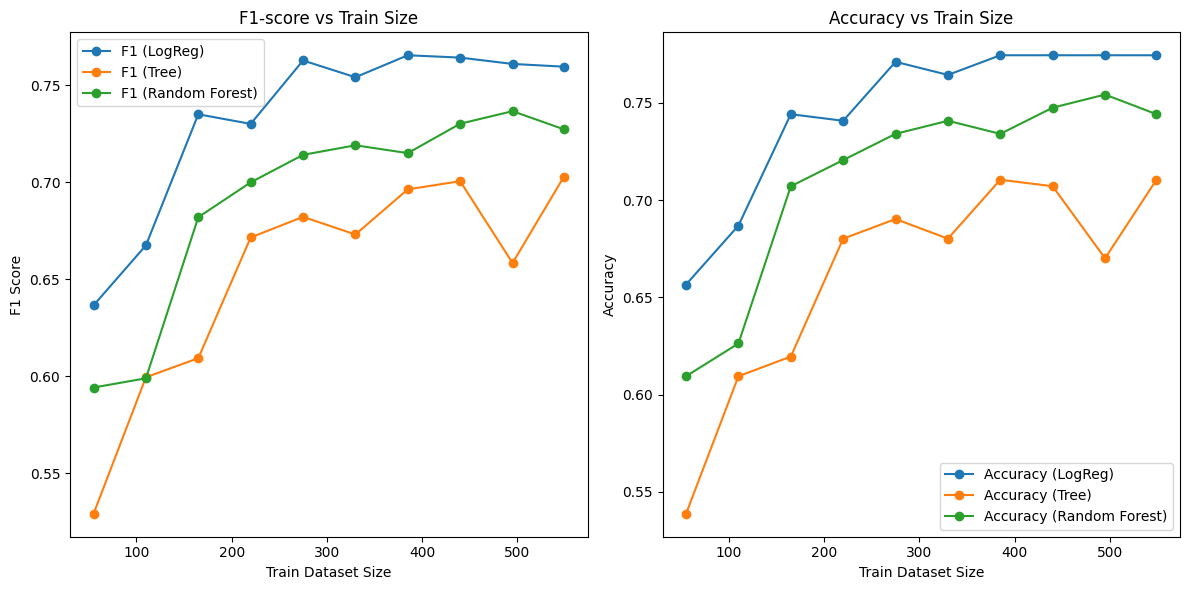

In [157]:
train_sizes = []
f1_scores_lr, acc_scores_lr = [], []
f1_scores_dt, acc_scores_dt = [], []
f1_scores_rf, acc_scores_rf = [], []

for i in range(1, 11):
    X_train_subset = np.vstack(X_train_parts[:i])
    y_train_subset = np.hstack(y_train_parts[:i])

    model_lr.fit(X_train_subset, y_train_subset)
    y_pred_lr = model_lr.predict(X_test)
    f1_scores_lr.append(f1_score(y_test, y_pred_lr, average='macro'))
    acc_scores_lr.append(accuracy_score(y_test, y_pred_lr))

    model_dt.fit(X_train_subset, y_train_subset)
    y_pred_dt = model_dt.predict(X_test)
    f1_scores_dt.append(f1_score(y_test, y_pred_dt, average='macro'))
    acc_scores_dt.append(accuracy_score(y_test, y_pred_dt))

    model_rf.fit(X_train_subset, y_train_subset)
    y_pred_rf = model_rf.predict(X_test)
    f1_scores_rf.append(f1_score(y_test, y_pred_rf, average='macro'))
    acc_scores_rf.append(accuracy_score(y_test, y_pred_rf))

    train_sizes.append(len(X_train_subset))


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes, f1_scores_lr, label='F1 (LogReg)', marker='o')
plt.plot(train_sizes, f1_scores_dt, label='F1 (Tree)', marker='o')
plt.plot(train_sizes, f1_scores_rf, label='F1 (Random Forest)', marker='o')
plt.title('F1-score vs Train Size')
plt.xlabel('Train Dataset Size')
plt.ylabel('F1 Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_sizes, acc_scores_lr, label='Accuracy (LogReg)', marker='o')
plt.plot(train_sizes, acc_scores_dt, label='Accuracy (Tree)', marker='o')
plt.plot(train_sizes, acc_scores_rf, label='Accuracy (Random Forest)', marker='o')
plt.title('Accuracy vs Train Size')
plt.xlabel('Train Dataset Size')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### Comment 2.8. Learning curve

- **Логистическая регрессия** демонстрирует стабильный рост качества (F1-score и Accuracy) по мере увеличения объема данных и достигает наилучших результатов среди всех моделей.
- **Случайный лес** показывает уверенный прирост качества на малых и средних выборках, но после определенного объема данных его результаты стабилизируются и слегка колеблются.
- **Дерево решений демонстрирует** менее стабильные результаты с заметными колебаниями, что может свидетельствовать о переобучении или чувствительности к структуре данных.

В целом, логистическая регрессия показывает наилучшую производительность и наибольшую стабильность на больших объемах данных, что делает ее наиболее подходящей моделью в данном контексте.